# NAME: JAYASREE S

# GRIP @ THE SPARKS FOUNDATION

# Data Science and Business Analytics Intern

# TASK-1: PREDICTION USING SUPERVISED ML
                            LEVEL-BEGINNER

In [28]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data from url

In [44]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the data

In [43]:
print(data.shape)

(25, 2)


In [46]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


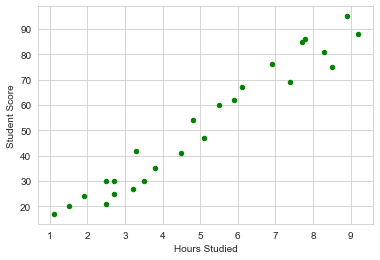

In [36]:
data.plot(kind='scatter', x='Hours', y='Scores', color="Green")
plt.xlabel('Hours Studied')
plt.ylabel('Student Score')
plt.show()

In [8]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


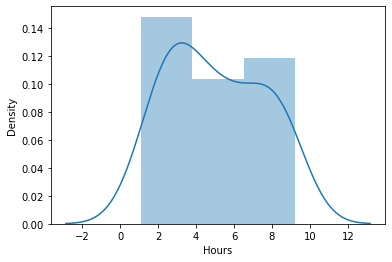

In [11]:
hrs = data['Hours']
score = data['Scores']
sns.distplot(hrs)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


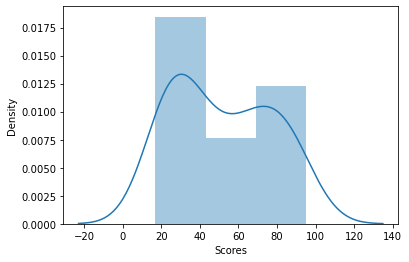

In [12]:
sns.distplot(score)

# Linear Regression

In [16]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [18]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train, Y_train)

LinearRegression()

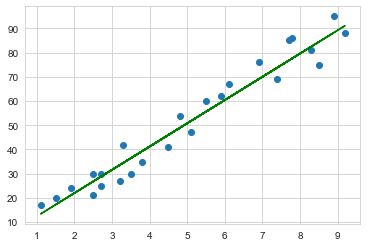

In [37]:
m = lin.coef_
c = lin.intercept_
line = m*X+c
plt.scatter(X, Y)
plt.plot(X, line, color="green");
plt.show()

In [24]:
Y_predict = lin.predict(X_test)

In [25]:
actual_prediction = pd.DataFrame({'Target':Y_test, 'Predicted':Y_predict})
actual_prediction

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


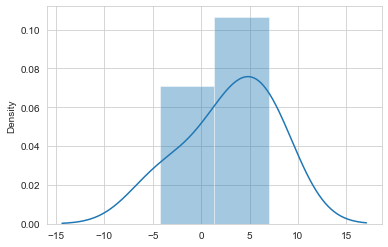

In [47]:
sns.distplot(np.array(Y_test-Y_predict))
plt.show()

# Model Evaluation

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error = ',metrics.mean_absolute_error(Y_test, Y_predict))
print('R2 Score = ',r2_score(Y_test, Y_predict))
print('Mean Squared Error = ',metrics.mean_squared_error(Y_test, Y_predict))

Mean Absolute Error =  4.5916495300630285
R2 Score =  0.971014141329942
Mean Squared Error =  25.584078296539932


# What will be predicted score if a student studies for 9.25 hrs/day?

In [39]:
hr = 9.25
s = lin.predict([[hr]])
print("If a student studies for {} hours/day he/she will score {} in exam...".format(hr, s))

If a student studies for 9.25 hours/day he/she will score [91.56986604] in exam...
